# Import Default Libraries

In [254]:
# Import default libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas 
import plotly.express as px

# Data Description Function
def desc(df):
    dataDesc = []

    for i in df.columns:
        dataDesc.append([
            i,
            df[i].dtypes,
            df[i].isna().sum(),
            round((((df[i].isna().sum()) / len(df)) * 100), 2),
            df[i].nunique(),
            df[i].drop_duplicates().sample(2).values
        ])

    description = pd.DataFrame(dataDesc, columns=[
        'Data Feature',
        'Data Types',
        'Null',
        'Null Percentage',
        'Unique',
        'Unique Sample'
    ])

    return description

# Sakila

query = """SELECT * FROM film_list
        
        """
df = return_df(query)
df.head(5)

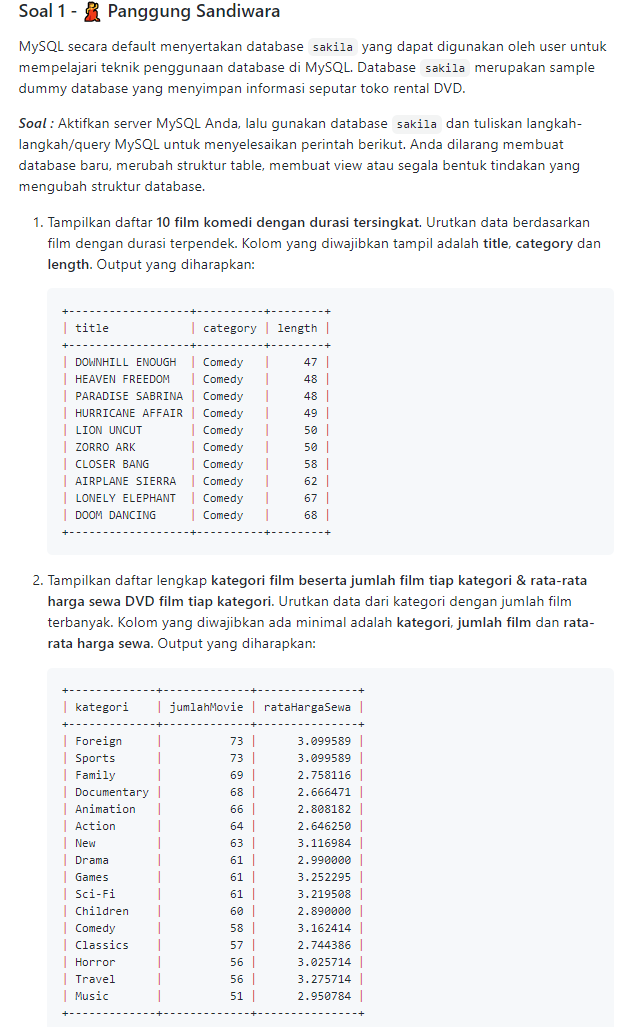

In [2]:
# Import Libraries
import mysql.connector
import pandas as pd
import numpy as np

# Set DB
myDB = {
    'user': 'damianus',
    'password': '12345',
    'host': 'localhost',
    'database': 'sakila'
}

# Define Client
connection = mysql.connector.connect(**myDB)
C = connection.cursor()

# Function to generate DataFrame
def return_df(query):
    C.execute(query)
    result = C.fetchall()
    df = pd.DataFrame(result, columns=C.column_names)
    return df

### 1) 10 Film komedi dengan durasi tersingkat

In [3]:
query = """SELECT title, category, length FROM film_list
        WHERE category='Comedy'
        ORDER BY length
        """
return_df(query).head(10)

title category  length
0   DOWNHILL ENOUGH   Comedy      47
1    HEAVEN FREEDOM   Comedy      48
2  PARADISE SABRINA   Comedy      48
3  HURRICANE AFFAIR   Comedy      49
4         ZORRO ARK   Comedy      50
5        LION UNCUT   Comedy      50
6       CLOSER BANG   Comedy      58
7   AIRPLANE SIERRA   Comedy      62
8   LONELY ELEPHANT   Comedy      67
9      DOOM DANCING   Comedy      68

### 2) Kategori film beserta jumlah film tiap kategori & rata-rata harga sewa DVD film tiap kategori

In [4]:
query = """SELECT category AS kategori, COUNT(category) AS jumlahMovie, AVG(price) AS rataHargaSewa FROM film_list
        GROUP BY kategori
        ORDER BY jumlahMovie DESC
        """
df = return_df(query)
df

kategori  jumlahMovie rataHargaSewa
0       Foreign           73      3.099589
1        Sports           73      3.099589
2        Family           69      2.758116
3   Documentary           68      2.666471
4     Animation           66      2.808182
5        Action           64      2.646250
6           New           63      3.116984
7        Sci-Fi           61      3.219508
8         Drama           61      2.990000
9         Games           61      3.252295
10     Children           60      2.890000
11       Comedy           58      3.162414
12     Classics           57      2.744386
13       Horror           56      3.025714
14       Travel           56      3.275714
15        Music           51      2.950784

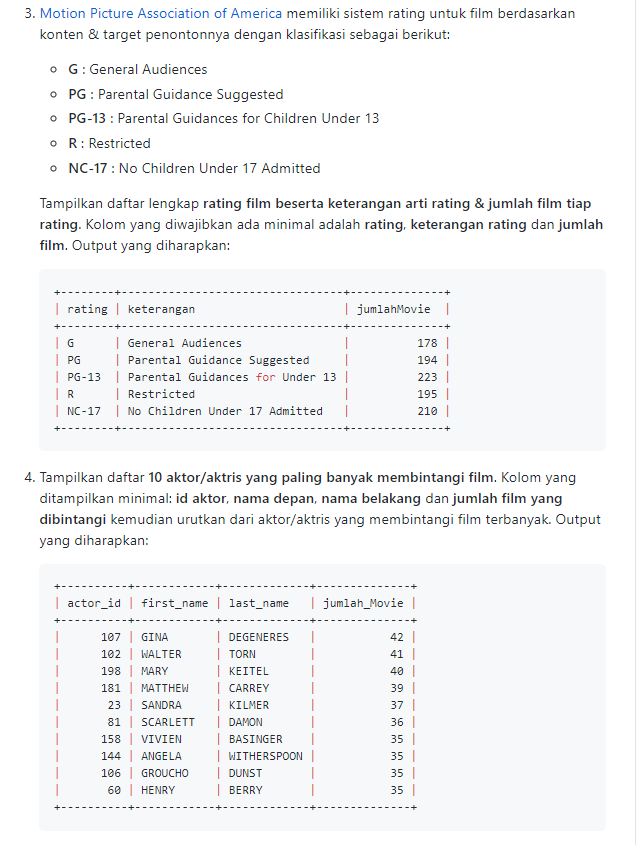

### 3) Rating film beserta keterangan arti rating & jumlah film tiap rating.

In [5]:
query = """SELECT rating, COUNT(rating) AS jumlahMovie FROM film
        GROUP BY rating
        ORDER BY rating
        """
df = return_df(query)
df['keterangan'] = ["General Audiences", "Parental Guidance Suggested", "Parental Guidances for Children Under 13", "Restricted", "No Children Under 17 Admitted"]
df_rating = df.loc[:, ['rating', 'keterangan', 'jumlahMovie']]
df_rating

rating                                keterangan  jumlahMovie
0      G                         General Audiences          178
1     PG               Parental Guidance Suggested          194
2  PG-13  Parental Guidances for Children Under 13          223
3      R                                Restricted          195
4  NC-17             No Children Under 17 Admitted          210

### 4) 10 aktor/aktris yang paling banyak membintangi film

In [6]:
query = """SELECT actor_info.actor_id, actor_info.first_name, actor_info.last_name, COUNT(film_actor.film_id) AS jumlah_Movie 
        FROM actor_info INNER JOIN film_actor
        ON actor_info.actor_id = film_actor.actor_id
        
        GROUP BY actor_id
        ORDER BY jumlah_Movie DESC
        LIMIT 20
        """
df = return_df(query)
df

actor_id first_name    last_name  jumlah_Movie
0        107       GINA    DEGENERES            42
1        102     WALTER         TORN            41
2        198       MARY       KEITEL            40
3        181    MATTHEW       CARREY            39
4         23     SANDRA       KILMER            37
5         81   SCARLETT        DAMON            36
6         37        VAL       BOLGER            35
7        106    GROUCHO        DUNST            35
8         13        UMA         WOOD            35
9        158     VIVIEN     BASINGER            35
10       144     ANGELA  WITHERSPOON            35
11        60      HENRY        BERRY            35
12        65     ANGELA       HUDSON            34
13       150      JAYNE        NOLTE            34
14       105     SIDNEY        CROWE            34
15        92    KIRSTEN       AKROYD            34
16       108     WARREN        NOLTE            34
17        83        BEN       WILLIS            33
18       101      SUSAN        DAVIS            33
19        26        RIP     CRAWFORD            33

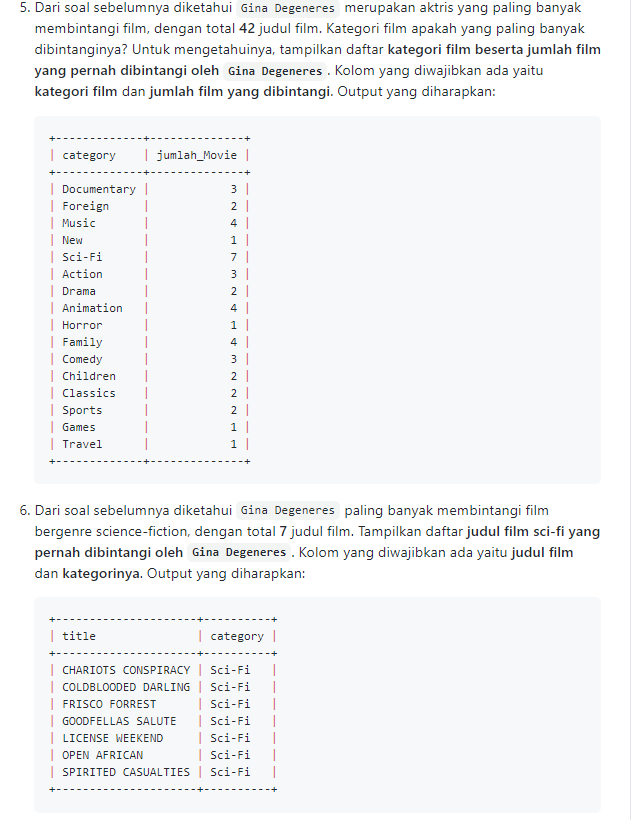

### 5) Kategori film beserta jumlah film yang pernah dibintangi oleh Gina Degeneres

In [90]:
# ALT 1
query = """SELECT film_list.category, COUNT(film_actor.film_id) AS jumlah_Movie 
    FROM film_list INNER JOIN film_actor
    ON film_list.FID = film_actor.film_id
    
    WHERE actor_id = 107
    
    GROUP BY film_list.category
    
    """
df = return_df(query) 
df

category  jumlah_Movie
0   Documentary             3
1       Foreign             2
2         Music             4
3           New             1
4        Sci-Fi             7
5        Action             3
6         Drama             2
7     Animation             4
8        Horror             1
9        Family             4
10       Comedy             3
11     Children             2
12     Classics             2
13       Sports             2
14        Games             1
15       Travel             1

In [91]:
# ALT 2
query = """SELECT film_list.category, COUNT(film_actor.actor_id) AS jumlah_Movie
    FROM film_actor INNER JOIN film_list
    ON film_actor.film_id = film_list.FID
    
    WHERE actor_id=107
    
    GROUP BY category
    """
df = return_df(query) 
df


# query = """SELECT film_list.category, film_actor.actor_id  
#     FROM film_actor INNER JOIN film_list
#     ON film_actor.film_id = film_list.FID
#     """
# df = return_df(query) 
# df
# df_gina = df[df.actor_id==107]
# df_gina

category  jumlah_Movie
0   Documentary             3
1       Foreign             2
2         Music             4
3           New             1
4        Sci-Fi             7
5        Action             3
6         Drama             2
7     Animation             4
8        Horror             1
9        Family             4
10       Comedy             3
11     Children             2
12     Classics             2
13       Sports             2
14        Games             1
15       Travel             1

### 6) Judul film sci-fi yang pernah dibintangi oleh Gina Degeneres

In [104]:
query = """SELECT film_list.title, film_list.category
    FROM film_actor INNER JOIN film_list
    ON film_actor.film_id = film_list.FID
    
    WHERE actor_id=107 AND category='Sci-Fi'  
    
    GROUP BY title
    """
df = return_df(query) 
df

title category
0  CHARIOTS CONSPIRACY   Sci-Fi
1  COLDBLOODED DARLING   Sci-Fi
2       FRISCO FORREST   Sci-Fi
3    GOODFELLAS SALUTE   Sci-Fi
4      LICENSE WEEKEND   Sci-Fi
5         OPEN AFRICAN   Sci-Fi
6  SPIRITED CASUALTIES   Sci-Fi

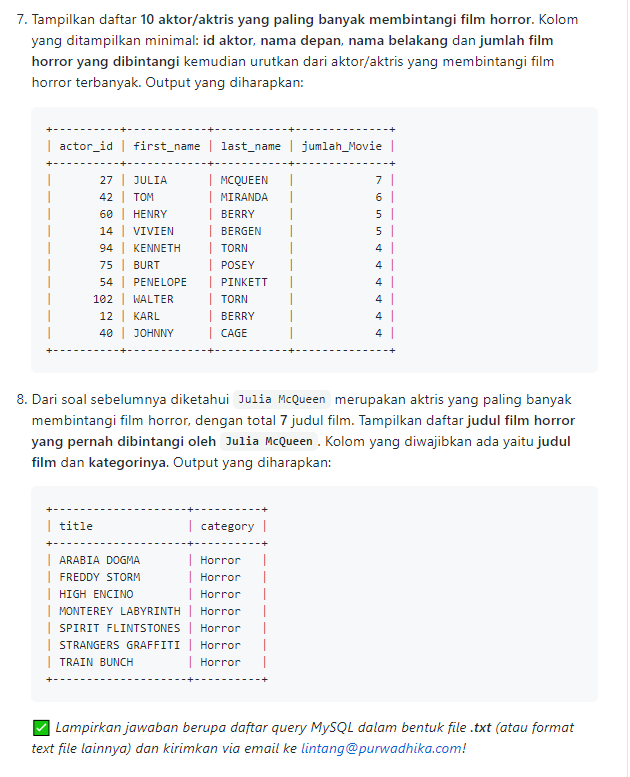

### 7)  10 aktor/aktris yang paling banyak membintangi film horror

In [156]:
# Join 4 tables, seach the chain key, place the main key in the first order
query = """SELECT actor_info.actor_id, actor_info.first_name, actor_info.last_name, COUNT(film_category.category_id) AS jumlah_Movie
    FROM actor_info
    JOIN film_actor USING (actor_id)
    JOIN film_category USING (film_id)
    JOIN category USING (category_id)
    
    WHERE category_id=11
    
    GROUP BY actor_id
    ORDER BY jumlah_Movie DESC
    LIMIT 10
    """
df = return_df(query) 
df

actor_id first_name last_name  jumlah_Movie
0        27      JULIA   MCQUEEN             7
1        42        TOM   MIRANDA             6
2        60      HENRY     BERRY             5
3        14     VIVIEN    BERGEN             5
4        26        RIP  CRAWFORD             4
5        94    KENNETH      TORN             4
6       179         ED   GUINESS             4
7       157      GRETA    MALDEN             4
8        40     JOHNNY      CAGE             4
9        75       BURT     POSEY             4

##### sequence to order the key

In [116]:
query = """SELECT * FROM actor_info
    """
df = return_df(query) 
df.head(1)

actor_id first_name last_name  \
0         1   PENELOPE   GUINESS   

                                           film_info  
0  Animation: ANACONDA CONFESSIONS; Children: LAN...

In [115]:
# actor_id to actor_id
query = """SELECT * FROM film_actor
    """
df = return_df(query) 
df.head(1)

actor_id  film_id         last_update
0         1        1 2006-02-15 05:05:03

In [125]:
# film_id to film_id
query = """SELECT * FROM film_category
    """
df = return_df(query) 
df.head(1)

film_id  category_id         last_update
0        1            6 2006-02-15 05:07:09

In [141]:
# category_id to category_id
query = """SELECT * FROM category
    """
df = return_df(query) 
df

category_id         name         last_update
0             1       Action 2006-02-15 04:46:27
1             2    Animation 2006-02-15 04:46:27
2             3     Children 2006-02-15 04:46:27
3             4     Classics 2006-02-15 04:46:27
4             5       Comedy 2006-02-15 04:46:27
5             6  Documentary 2006-02-15 04:46:27
6             7        Drama 2006-02-15 04:46:27
7             8       Family 2006-02-15 04:46:27
8             9      Foreign 2006-02-15 04:46:27
9            10        Games 2006-02-15 04:46:27
10           11       Horror 2006-02-15 04:46:27
11           12        Music 2006-02-15 04:46:27
12           13          New 2006-02-15 04:46:27
13           14       Sci-Fi 2006-02-15 04:46:27
14           15       Sports 2006-02-15 04:46:27
15           16       Travel 2006-02-15 04:46:27

### 8) Judul film horror yang pernah dibintangi oleh Julia McQueen

In [164]:
query = """SELECT film_list.title, film_list.category
    FROM film_actor INNER JOIN film_list
    ON film_actor.film_id = film_list.FID
    
    WHERE actor_id=27 AND category='Horror'  
    
    GROUP BY title
    """
df = return_df(query) 
df

title category
0        ARABIA DOGMA   Horror
1        FREDDY STORM   Horror
2         HIGH ENCINO   Horror
3  MONTEREY LABYRINTH   Horror
4  SPIRIT FLINTSTONES   Horror
5  STRANGERS GRAFFITI   Horror
6         TRAIN BUNCH   Horror

##### sequence to order the key

In [161]:
query = """SELECT * FROM film_actor
    """
df = return_df(query) 
df.head(1)

actor_id  film_id         last_update
0         1        1 2006-02-15 05:05:03

In [163]:
# film_id to FID
query = """SELECT * FROM film_list
    """
df = return_df(query) 
df.head(1)

FID             title                                        description  \
0    1  ACADEMY DINOSAUR  A Epic Drama of a Feminist And a Mad Scientist...   

      category price  length rating  \
0  Documentary  0.99      86     PG   

                                              actors  
0  WARREN NOLTE, OPRAH KILMER, ROCK DUKAKIS, MENA...

# Kerja Kerja Kerja
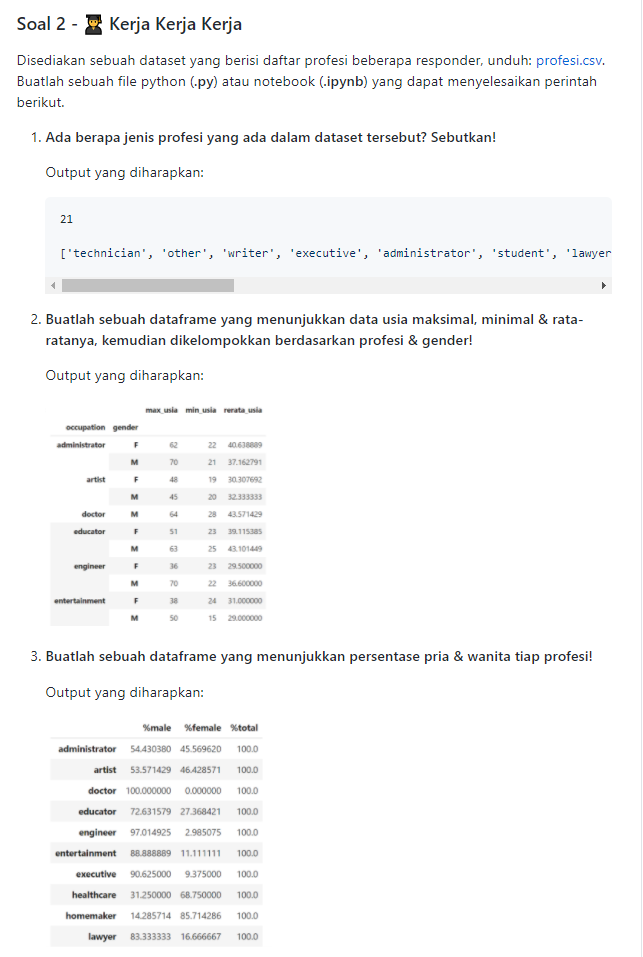

### Import Data

In [171]:
df = pd.read_csv('profesi.csv', delimiter="|")
df.head()

user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

### 1) Ada berapa jenis profesi yang ada dalam dataset tersebut? Sebutkan!

In [172]:
print(df.occupation.nunique())
print(df.occupation.unique())

21
['technician' 'other' 'writer' 'executive' 'administrator' 'student'
 'lawyer' 'educator' 'scientist' 'entertainment' 'programmer' 'librarian'
 'homemaker' 'artist' 'engineer' 'marketing' 'none' 'healthcare' 'retired'
 'salesman' 'doctor']


### 2) Buatlah sebuah dataframe yang menunjukkan data usia maksimal, minimal & rata-ratanya, kemudian dikelompokkan berdasarkan profesi & gender!
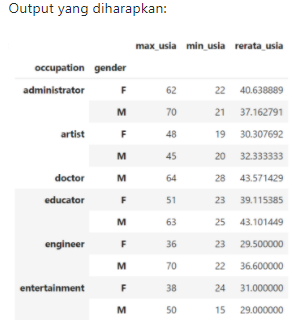

In [173]:
df.head(1)

user_id  age gender  occupation zip_code
0        1   24      M  technician    85711

In [222]:
df_prof_gender = pd.crosstab(index=[df['occupation'], df['gender']], columns=['usia'], colnames=[''], values=df['age'], aggfunc=['max', 'min', 'mean'])
df_prof_gender.head(11)

max  min       mean
                     usia usia       usia
occupation    gender                     
administrator F        62   22  40.638889
              M        70   21  37.162791
artist        F        48   19  30.307692
              M        45   20  32.333333
doctor        M        64   28  43.571429
educator      F        51   23  39.115385
              M        63   25  43.101449
engineer      F        36   23  29.500000
              M        70   22  36.600000
entertainment F        38   24  31.000000
              M        50   15  29.000000

In [243]:
# cannot use pivot table
pd.pivot_table(data=df, index=['occupation', 'gender'], aggfunc=['max', 'min', 'mean']).head()

max                  min                        mean  \
                     age user_id zip_code age user_id zip_code        age   
occupation    gender                                                        
administrator F       62     922    V1G4L  22      34    03062  40.638889   
              M       70     940    M7A1A  21       7    02154  37.162791   
artist        F       48     920    V5A2B  19      23    02139  30.307692   
              M       45     865    98006  20      31    01945  32.333333   
doctor        M       64     935    97405  28     138    47401  43.571429   

                                  
                         user_id  
occupation    gender              
administrator F       443.944444  
              M       420.069767  
artist        F       432.153846  
              M       469.000000  
doctor        M       533.714286

### 3) Buatlah sebuah dataframe yang menunjukkan persentase pria & wanita tiap profesi!

In [252]:
pd.crosstab(index=df['occupation'], colnames=[''], columns=df['gender'])

F    M
occupation            
administrator  36   43
artist         13   15
doctor          0    7
educator       26   69
engineer        2   65
entertainment   2   16
executive       3   29
healthcare     11    5
homemaker       6    1
lawyer          2   10
librarian      29   22
marketing      10   16
none            4    5
other          36   69
programmer      6   60
retired         1   13
salesman        3    9
scientist       3   28
student        60  136
technician      1   26
writer         19   26

### 4) Barplot Occupation Distribution

In [258]:
df.head()

user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

In [256]:
fig = px.bar(df, x='occupation', y='age')
fig.show()

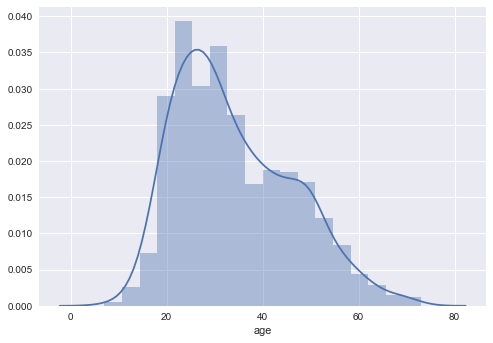

In [262]:
plt.style.use('seaborn')
sns.distplot(df['age'])
plt.show()

# World Happiness

https://www.kaggle.com/unsdsn/world-happiness#2019.csv

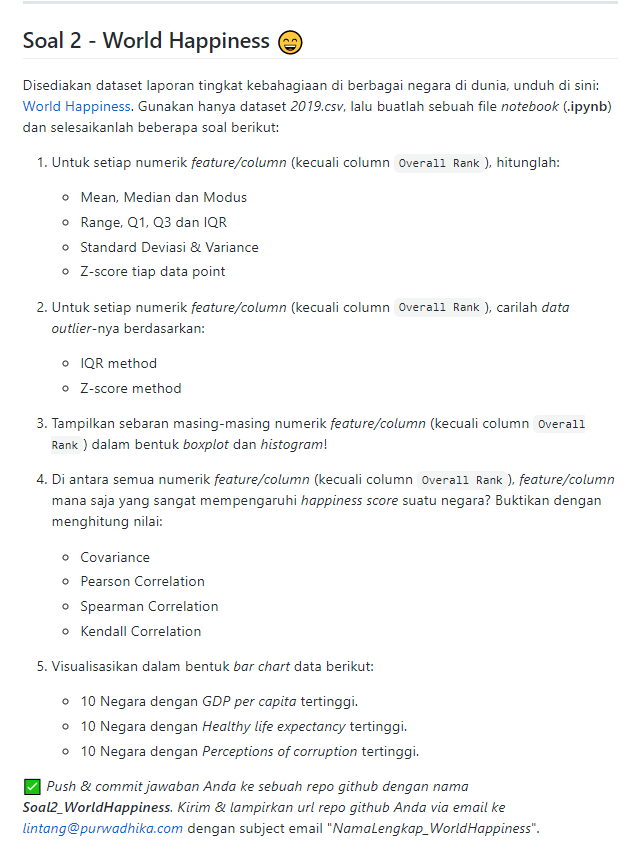

# COVID-19 Map
- Data sebaran Covid-19 tiap provinsi di Indonesia: klik sini https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Indonesia), untuk mengaksesnya silakan gunakan teknik web scraping.
- Data lokasi latitude & longitude tiap provinsi di Indonesia: klik sini (https://raw.githubusercontent.com/LintangWisesa/Indonesia-Covid19-Maps/master/data/gps_indonesia.json), untuk mengaksesnya silakan lakukan GET request ke https://raw.githubusercontent.com/LintangWisesa/Indonesia-Covid19-Maps/master/data/gps_indonesia.json.

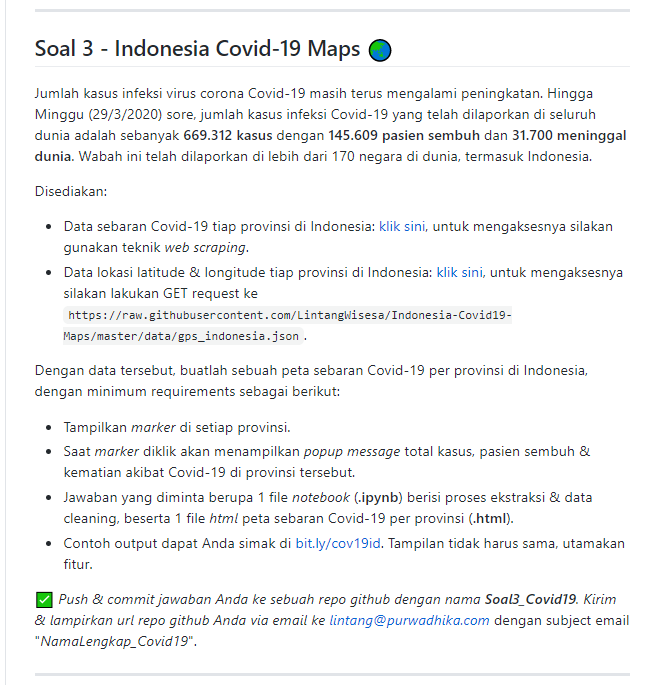

# McD Nutrition
https://www.kaggle.com/mcdonalds/nutrition-facts
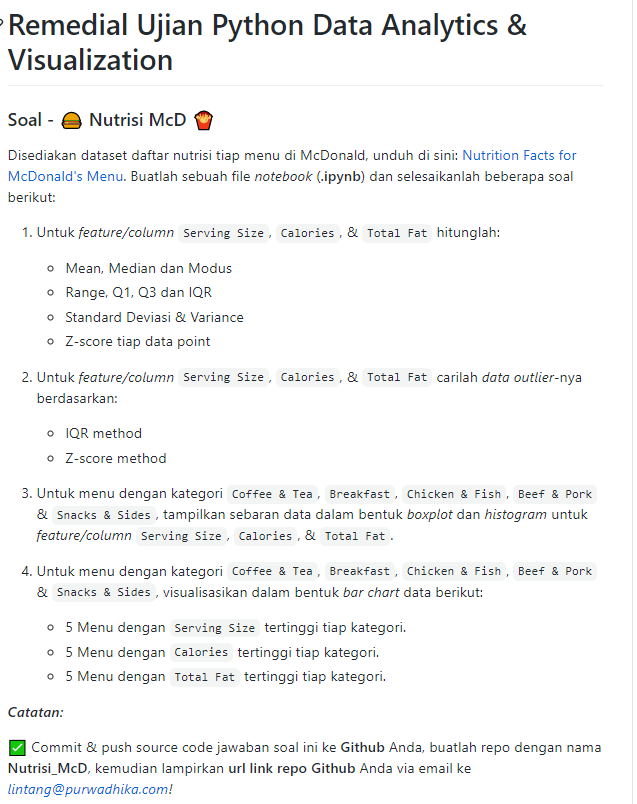